<a href="https://colab.research.google.com/github/naticanci/Masters_Python_Thesis/blob/main/Copy_of_densidad_poblacional_Bogota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as Pandas
import seaborn as SeaBorn
import matplotlib.pyplot as PyPlot

# Clasificando las localidades de Bogotá, de acuerdo a la composición de sus UPZ.

Vamos a usar un Dataset básico con información acerca de las diferentes UPZ de Bogotá (usando en el [ejemplo dado](https://colab.research.google.com/drive/1Cd709orF8uTW8ObTtigtHLub3uUH4AU_?usp=sharing)), para diseñar algunos KPI y hacer clasificación sobre la información geográfica y demográfica de las UPZ de Bogotá.

Vamos a importar el Dataset no de un archivo local, sino como recurso web embebido en GitHub.


In [ ]:
info_upz=Pandas.read_csv('https://raw.githubusercontent.com/naticanci/unipoli/main/BD%20Hotel.csv?token=APNJJDI3GFFC2JNTG5WLJI277YJS6',
                         sep=';',
                         decimal=',')
info_upz

HTTPError: ignored

En este dataset tenemos cuatro datos maestros y tres datos transaccionales:

* Datos maestros: código de localidad (**cod_localidad**), código de UPZ (**cod_upz**), nombre de la localidad (**localidad**) y nombre de la UPZ (**upz**).

* Datos transaccionales: extensión en $km^2$ de la UPZ (**extension**), población de la UPZ a datos del 2015 (**población**) y densidad poblacional de la UPZ en $personas/km^2$ (**densidad**).

Dentro de los datos maestros tenemos una categoría incluyente: las UPZ hacen parte de las localidades, luego la clasificación más natural debe ser a nivel de localidad.

Podemos construir una tabla pivote para ver los indicadores de las localidades, con esto podemos saber qué tan grandes son las localidades de Bogotá en términos de extensión y población.

En términos de localidades ahora podemos ver cómo se comportan en extensión y población.

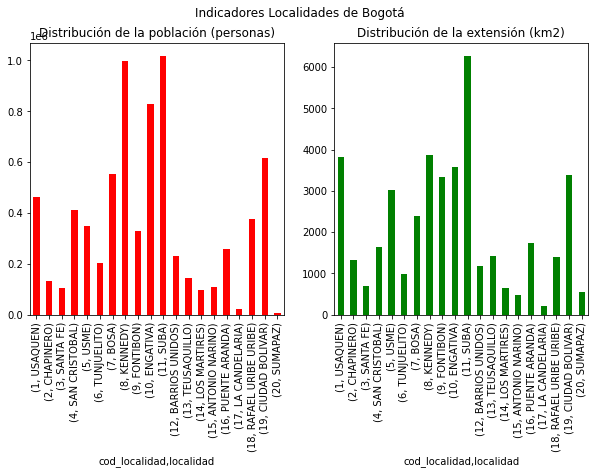

In [ ]:
Figura, subFiguras = PyPlot.subplots(1,2,figsize=(10,5),sharex=True)
Figura.suptitle('Indicadores Localidades de Bogotá')
subFiguras[0].set_title('Distribución de la población (personas)')
subFiguras[1].set_title('Distribución de la extensión (km2)')
info_localidad['poblacion'].plot(kind='bar',ax=subFiguras[0],color='red')
info_localidad['extension'].plot(kind='bar',ax=subFiguras[1],color='green')
PyPlot.show()

In [ ]:
info_hotel = Pandas.pivot_table(data=info_upz,
                                       index=['Cédula','Procedencia','Tipo hab.'],
                                       values=['Visitas al mes'],
                                       aggfunc={'Visitas al mes':'sum'
                                    }
                                    )
info_hotel

,,,Visitas al mes
Cédula,Procedencia,Tipo hab.,
10516790,POPAYÁN,Doble,1
13427768,PEREIRA,Sencilla,4
17703551,CURILLO,Sencilla,6
35799279,FLORENCIA,Doble,1
46178491,BOGOTÁ,Sencilla,1
...,...,...,...
1144054745,PUERTO TEJADA,Sencilla,4
1144072719,CORINTO,Sencilla,6
1151939187,BOGOTÁ,Sencilla,5


Tenemos localidades de muy alta poblacíon y localidades de baja población, tenemos localidades de gran extensión y de poca extensión. Necesitamos introducir un primer KPI: la densidad poblacional en toda la localidad que lo podemos calcular dividiendo la población de toda la localidad $P_{loc}$ por la extensión de la localidad $E_{loc}$:

>>$d_{loc} = \frac{P_{loc}}{E_{loc}}$

In [ ]:
info_localidad['densidad'] = info_localidad['poblacion']/info_localidad['extension']
info_localidad

,,cod_upz,extension,poblacion,densidad
cod_localidad,localidad,,,,
1,USAQUEN,9,3807.206601,461759,121.285511
2,CHAPINERO,5,1315.945685,130728,99.341486
3,SANTA FE,5,697.165850,103544,148.521331
4,SAN CRISTOBAL,5,1648.281488,410092,248.799737
5,USME,7,3029.274751,349176,115.267194
6,TUNJUELITO,2,986.625261,202119,204.858935
7,BOSA,5,2393.555890,554389,231.617320
8,KENNEDY,12,3859.285654,997693,258.517531
9,FONTIBON,8,3326.821733,330156,99.240665


La densidad poblacional es un indicador mucho más *justo* que la extensión o la población y nos permite comparar localidades muy grandes con localidades muy pequeñas. Veamos las gráficas correspondientes incluyendo ahora la densidad:

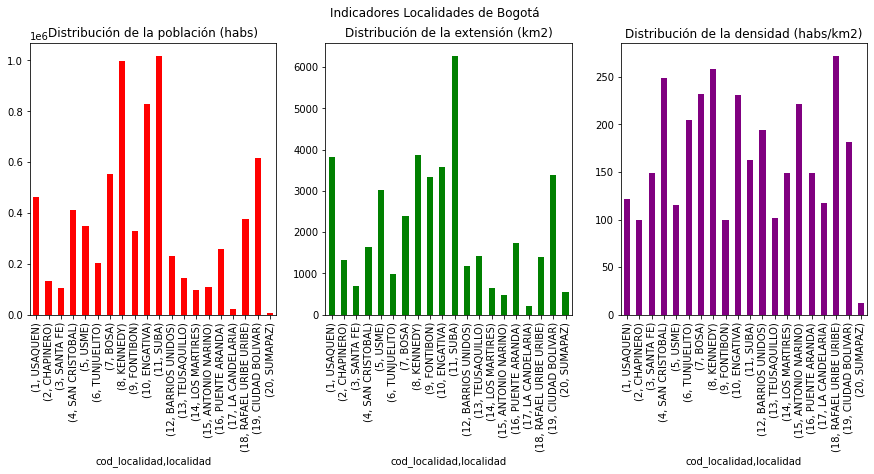

In [ ]:
Figura, subFiguras = PyPlot.subplots(1,3,figsize=(15,5),sharex=True)
Figura.suptitle('Indicadores Localidades de Bogotá')
subFiguras[0].set_title('Distribución de la población (habs)')
subFiguras[1].set_title('Distribución de la extensión (km2)')
subFiguras[2].set_title('Distribución de la densidad (habs/km2)')
info_localidad['poblacion'].plot(kind='bar',ax=subFiguras[0],color='red')
info_localidad['extension'].plot(kind='bar',ax=subFiguras[1],color='green')
info_localidad['densidad'].plot(kind='bar',ax=subFiguras[2],color='purple')
PyPlot.show()

Ahora, nos podemos preguntar por lo que es usual y no es usual en Bogotá: lo *normal* en el sentido estadístico. Para esto, veamos un histograma de la densidad poblacional tanto en las UPZ de Bogotá como en las diferentes localidades:

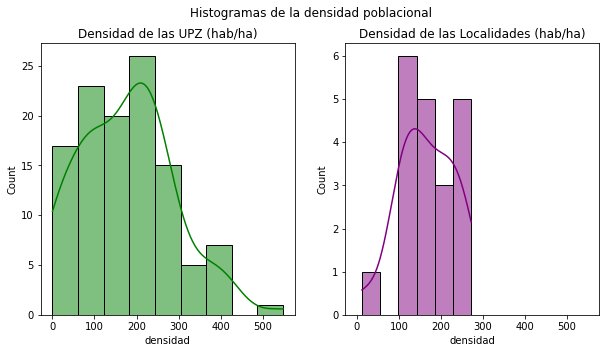

In [ ]:
Figura, subFiguras = PyPlot.subplots(1,2,figsize=(10,5),sharex=True)
Figura.suptitle('Histogramas de la densidad poblacional')
subFiguras[0].set_title('Densidad de las UPZ (hab/ha)')
subFiguras[1].set_title('Densidad de las Localidades (hab/ha)')
SeaBorn.histplot(data=info_upz,x='densidad',ax=subFiguras[0],color='green',kde=True)
SeaBorn.histplot(data=info_localidad,x='densidad',ax=subFiguras[1],color='purple',kde=True)
PyPlot.show()

Notemos que al comparar los histogramas, la densidad poblacional de las UPZ es mucho más alta que la densidad de las localidades. Además, ni las localidades, ni las UPZ se ajustan a ninguna curva probabilística conocida.

Veamos en términos de medidas probabilísticas cómo se comportan las UPZ y las localidades:

In [ ]:
densidad_prom_upz = info_upz['densidad'].mean()
densidad_prom_localidad = info_localidad['densidad'].mean()
densidad_desviacion_upz = info_upz['densidad'].std()
densidad_desviacion_localidad = info_localidad['densidad'].std()
print("Información de las UPZ")
print("densidad promedio: ","{:,.2f}".format(densidad_prom_upz)," habitantes/km2")
print("desviación de la densidad: ","{:,.2f}".format(densidad_desviacion_upz)," habitantes/km2")
print()
print("Información de las Localidades")
print("densidad promedio: ","{:,.2f}".format(densidad_prom_localidad)," habitantes/km2")
print("desviación de la densidad: ","{:,.2f}".format(densidad_desviacion_localidad)," habitantes/km2")

Información de las UPZ
densidad promedio:  177.27  habitantes/km2
desviación de la densidad:  112.88  habitantes/km2

Información de las Localidades
densidad promedio:  165.96  habitantes/km2
desviación de la densidad:  67.04  habitantes/km2


Quisieramos poder introducir un indicador *intra-localidad* parar poder comparar las UPZ dentro de la localidad. Sin embargo, esto no lo podemos hacer estadísticamente usando medias y desviaciones pues tenemos una localidad (Sumapaz) que es UPZ y es localidad al mismo tiempo. Sin embargo, calculemos los indicadores de localidad:

In [ ]:
estadisticos_intra_localidad = Pandas.pivot_table(data=info_upz,
                                                  index=['cod_localidad','localidad'],
                                                  values='densidad',
                                                  aggfunc=['mean','std'])
estadisticos_intra_localidad

,,mean,std
,,densidad,densidad
cod_localidad,localidad,,
1,USAQUEN,133.788125,91.361577
2,CHAPINERO,110.973421,33.335557
3,SANTA FE,154.008591,92.374875
4,SAN CRISTOBAL,251.054261,62.642969
5,USME,131.750928,103.308126
6,TUNJUELITO,197.670307,30.199983
7,BOSA,227.940187,134.767595
8,KENNEDY,259.388686,140.547815


Notemos que la densidad promedio a nivel de localidad es relativamente cercana a la densidad a nivel de UPZ. Sin embargo, la diferencia más grande se encuentra en la desviación: la desviación en la densidad a nivel de UPZ es el doble de la desviación de la densidad a nivel de localidad. De este modo, podemos hablar de UPZ que están dentro de los rangos esperados en la ciudad y podemos hablar de UPZ que no son normales dentro de los rangos esperados para la ciudad.

En este sentido, vale la pena estandarizar los datos de las UPZ con respecto a la desviación y media de la ciudad para ver cómo las diferentes UPZ se comportan con respecto a los parámetros de la ciudad en general. En este sentido, definimos un *z-score* para las UPZ a partir de los parámetros de la ciudad por medio de:

>>$z_{ciud} = \frac{d_{upz}-\bar{d}_{ciudad}}{\sigma_{ciudad}}$

De la misma forma, podemos estandarizar los datos con respecto a los parámetros de las upz creando otro *z-score* con respecto a las UPZ:

>>$z_{upz} = \frac{d_{upz}-\bar{d}_{upz}}{\sigma_{upz}}$


In [ ]:
info_upz['z_ciudad'] = (info_upz['densidad'] - densidad_prom_localidad)/densidad_desviacion_localidad
info_upz['z_upz'] = (info_upz['densidad'] - densidad_prom_upz)/densidad_desviacion_upz

In [ ]:
info_upz

,cod_localidad,localidad,cod_upz,upz,extension,poblacion,densidad,z_ciudad,z_upz
0,2,CHAPINERO,90,PARDO RUBIO,285.199005,37191,130.403681,-0.530401,-0.415182
1,3,SANTA FE,96,LOURDES,200.137127,46301,231.346381,0.975247,0.479041
2,4,SAN CRISTOBAL,50,LA GLORIA,385.857759,102299,265.121013,1.479025,0.778241
3,5,USME,61,CIUDAD USME,925.470477,13496,14.582853,-2.257970,-1.441207
4,6,TUNJUELITO,42,VENECIA,659.377024,144420,219.024920,0.791462,0.369888
...,...,...,...,...,...,...,...,...,...
109,12,BARRIOS UNIDOS,98,LOS ALCAZARES,414.026998,82086,198.262433,0.481771,0.185959
110,15,ANTONIO NARINO,35,CIUDAD JARDIN,133.239133,30913,232.011416,0.985167,0.484932
111,18,RAFAEL URIBE URIBE,36,SAN JOSE,207.947107,49050,235.877290,1.042830,0.519179
112,19,CIUDAD BOLIVAR,70,JERUSALEM,537.476344,98693,183.622965,0.263411,0.056272


Ahora, veamos en términos de un histograma, cómo se comportan las UPZ de Bogotá con respecto a la estandarización con los parámetros de la ciudad:

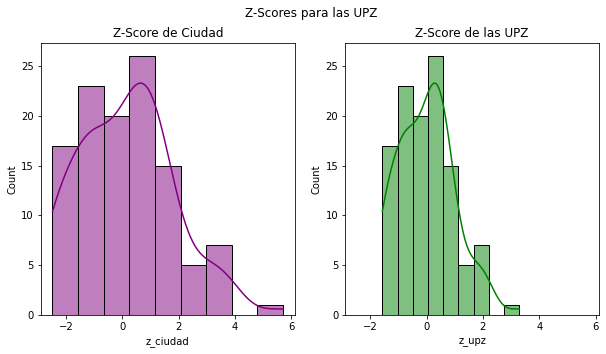

In [ ]:
Figura, subFiguras = PyPlot.subplots(1,2,figsize=(10,5),sharex=True)
Figura.suptitle('Z-Scores para las UPZ')
subFiguras[0].set_title('Z-Score de Ciudad')
subFiguras[1].set_title('Z-Score de las UPZ')
SeaBorn.histplot(data=info_upz,x='z_ciudad',kde=True,ax=subFiguras[0],color='purple')
SeaBorn.histplot(data=info_upz,x='z_upz',kde=True,ax=subFiguras[1],color='green')
PyPlot.show()

Normalmente, al estandarizar los datos, con un 95% de confianza, las observaciones que son gobernadas por una distribución particular están en el rango $[-1.96,1.96]$. Esto es. Dado que tenemos 2 z-scores diferentes (para UPZ y para la ciudad), necesitaremos clasificar las UPZ en dos niveles: las que son anormales con respecto a la ciudad (desde las localidades) y las que son anormales desde el punto de vista de las UPZ.

Esto lo podemos hacer usando funciones lambda:

In [ ]:
#función de clasificación para la ciudad
def clasificar_ciudad(row):
  if abs(row['z_ciudad'])>1.96:
    return 'ANORMAL_CIUDAD'
  else:
    return 'NORMAL_CIUDAD'
#función de clasificación para las UPZ
def clasificar_upz(row):
  if abs(row['z_upz'])>1.96:
    return 'ANORMAL_UPZ'
  else:
    return 'NORMAL_UPZ'

Ahora, calculamos las clasificaciones y las incluimos para las UPZ:

In [ ]:
info_upz['clas_ciudad'] = info_upz.apply(lambda row: clasificar_ciudad(row),axis=1)
info_upz['clas_upz'] = info_upz.apply(lambda row: clasificar_upz(row),axis=1)
info_upz

,cod_localidad,localidad,cod_upz,upz,extension,poblacion,densidad,z_ciudad,z_upz,clas_ciudad,clas_upz
0,2,CHAPINERO,90,PARDO RUBIO,285.199005,37191,130.403681,-0.530401,-0.415182,NORMAL_CIUDAD,NORMAL_UPZ
1,3,SANTA FE,96,LOURDES,200.137127,46301,231.346381,0.975247,0.479041,NORMAL_CIUDAD,NORMAL_UPZ
2,4,SAN CRISTOBAL,50,LA GLORIA,385.857759,102299,265.121013,1.479025,0.778241,NORMAL_CIUDAD,NORMAL_UPZ
3,5,USME,61,CIUDAD USME,925.470477,13496,14.582853,-2.257970,-1.441207,ANORMAL_CIUDAD,NORMAL_UPZ
4,6,TUNJUELITO,42,VENECIA,659.377024,144420,219.024920,0.791462,0.369888,NORMAL_CIUDAD,NORMAL_UPZ
...,...,...,...,...,...,...,...,...,...,...,...
109,12,BARRIOS UNIDOS,98,LOS ALCAZARES,414.026998,82086,198.262433,0.481771,0.185959,NORMAL_CIUDAD,NORMAL_UPZ
110,15,ANTONIO NARINO,35,CIUDAD JARDIN,133.239133,30913,232.011416,0.985167,0.484932,NORMAL_CIUDAD,NORMAL_UPZ
111,18,RAFAEL URIBE URIBE,36,SAN JOSE,207.947107,49050,235.877290,1.042830,0.519179,NORMAL_CIUDAD,NORMAL_UPZ
112,19,CIUDAD BOLIVAR,70,JERUSALEM,537.476344,98693,183.622965,0.263411,0.056272,NORMAL_CIUDAD,NORMAL_UPZ


Ahora, podemos hacer una matriz de confusión para poder ver cómo se correlacionan los normales y anormales de la ciudad y las UPZ.

In [ ]:
matriz_confusion = Pandas.pivot_table(data=info_upz,columns='clas_ciudad',index='clas_upz',values='cod_upz',aggfunc='count',fill_value=0)
matriz_confusion

clas_ciudad,ANORMAL_CIUDAD,NORMAL_CIUDAD
clas_upz,,
ANORMAL_UPZ,4,0
NORMAL_UPZ,22,88


Así, tenemos 4 UPZ Que son anormales para la ciudad y dentro de las mismas UPZ, tenemos 22 UPZ que son normales dentro de las UPZ, pero anormales para la ciudad y ninguna UPZ que es normal para la ciudad pero anormal para las UPZ (que tiene mucho sentido). Veámoslas.

In [ ]:
info_upz.loc[(info_upz['clas_upz']=='ANORMAL_UPZ') & (info_upz['clas_ciudad']=='ANORMAL_CIUDAD')]

,cod_localidad,localidad,cod_upz,upz,extension,poblacion,densidad,z_ciudad,z_upz,clas_ciudad,clas_upz
46,8,KENNEDY,82,PATIO BONITO,317.321662,174145,548.796446,5.710292,3.291242,ANORMAL_CIUDAD,ANORMAL_UPZ
50,11,SUBA,28,EL RINCON,710.088819,302006,425.307359,3.868345,2.197287,ANORMAL_CIUDAD,ANORMAL_UPZ
75,7,BOSA,84,BOSA OCCIDENTAL,430.379854,178960,415.818720,3.726813,2.113230,ANORMAL_CIUDAD,ANORMAL_UPZ
81,19,CIUDAD BOLIVAR,66,SAN FRANCISCO,178.603384,76213,426.716438,3.889362,2.209770,ANORMAL_CIUDAD,ANORMAL_UPZ


Ver las 22 UPZ que son anormales para la ciudad, pero que son normales entre las UPZ sería dispendioso. Lo que si podemos contar es el número de normales y anormales dentro de cada Localidad, vía una tabla pivote de nuevo.

In [ ]:
normales_por_localidad = Pandas.pivot_table(data=info_upz,
                                            index=['cod_localidad','localidad'],
                                            columns=['clas_ciudad'],
                                            values='cod_upz',
                                            aggfunc='count',
                                            fill_value=0)
#corregimos los índices para tener una tabla dinámica bonita
normales_por_localidad = normales_por_localidad.reset_index().set_index(['cod_localidad','localidad'])

Así, podemos definir un KPI para las localidades: la *excentricidad* que sería el cociente entre el número de UPZs anormales y las normales y la  *anormalidad* de la localidad que sería el porcentaje de localidades anormales dentro de la localidad.

In [ ]:
normales_por_localidad['excentricidad'] = normales_por_localidad['ANORMAL_CIUDAD']/normales_por_localidad['NORMAL_CIUDAD']
normales_por_localidad['anormalidad'] = normales_por_localidad['ANORMAL_CIUDAD']/(normales_por_localidad['ANORMAL_CIUDAD']+normales_por_localidad['NORMAL_CIUDAD'])
normales_por_localidad

,clas_ciudad,ANORMAL_CIUDAD,NORMAL_CIUDAD,excentricidad,anormalidad
cod_localidad,localidad,,,,
1,USAQUEN,1,8,0.125000,0.111111
2,CHAPINERO,0,5,0.000000,0.000000
3,SANTA FE,0,5,0.000000,0.000000
4,SAN CRISTOBAL,1,4,0.250000,0.200000
5,USME,2,5,0.400000,0.285714
6,TUNJUELITO,0,2,0.000000,0.000000
7,BOSA,2,3,0.666667,0.400000
8,KENNEDY,4,8,0.500000,0.333333
9,FONTIBON,1,7,0.142857,0.125000


Veamos cómo se distribuyen estos dos KPI dentro de Bogotá usando histogramas.

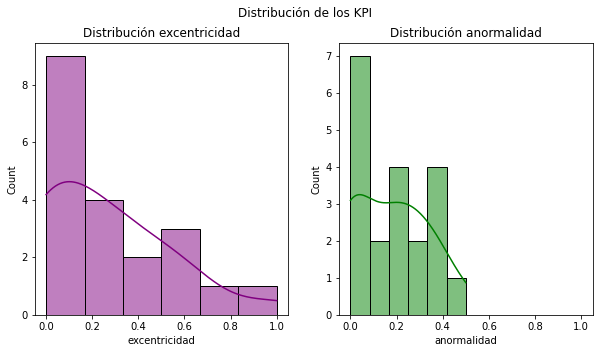

In [ ]:
Figura, subFiguras = PyPlot.subplots(1,2,figsize=(10,5),sharex=True)
Figura.suptitle('Distribución de los KPI')
subFiguras[0].set_title('Distribución excentricidad')
subFiguras[1].set_title('Distribución anormalidad')
SeaBorn.histplot(data=normales_por_localidad,x='excentricidad',kde=True,ax=subFiguras[0],color='purple')
SeaBorn.histplot(data=normales_por_localidad,x='anormalidad',kde=True,ax=subFiguras[1],color='green')
PyPlot.show()

De igual modo, podemos ver cómo se distribuyen estos KPI para las localidades. Esto lo podemos graficar usando diagramas de barras.

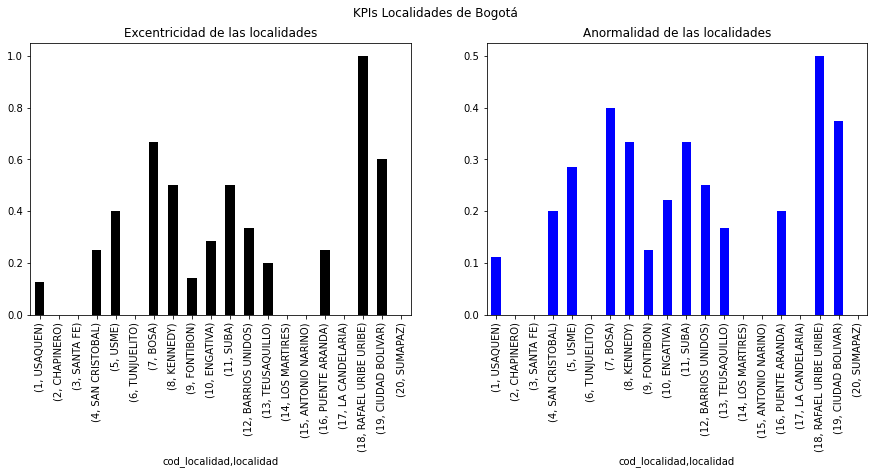

In [ ]:
Figura, subFiguras = PyPlot.subplots(1,2,figsize=(15,5),sharex=True)
Figura.suptitle('KPIs Localidades de Bogotá')
subFiguras[0].set_title('Excentricidad de las localidades')
subFiguras[1].set_title('Anormalidad de las localidades')
normales_por_localidad['excentricidad'].plot(kind='bar',ax=subFiguras[0],color='black')
normales_por_localidad['anormalidad'].plot(kind='bar',ax=subFiguras[1],color='blue')
PyPlot.show()

Estos dos indicadores también los podemos ver en un diagrama de dispersión, pues hicimos una reducción de dimensión a través del diseño de los dos KPI.

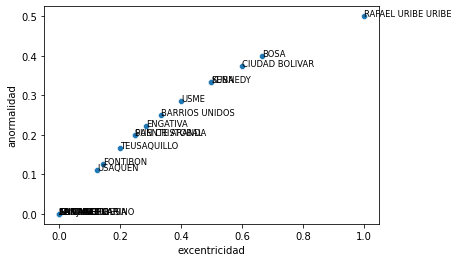

In [ ]:
dispersion = SeaBorn.scatterplot(data=normales_por_localidad,x='excentricidad',y='anormalidad')

for idx,fila in normales_por_localidad.iterrows():
  x = fila['excentricidad']
  y = fila['anormalidad']
  nombre = idx[1]
  dispersion.text(x,y,nombre,horizontalalignment='left',size='small')


Tenemos múltiples grupos con respecto a estos KPI. Una buena manera de encontrarlos sería usando un dendrograma.

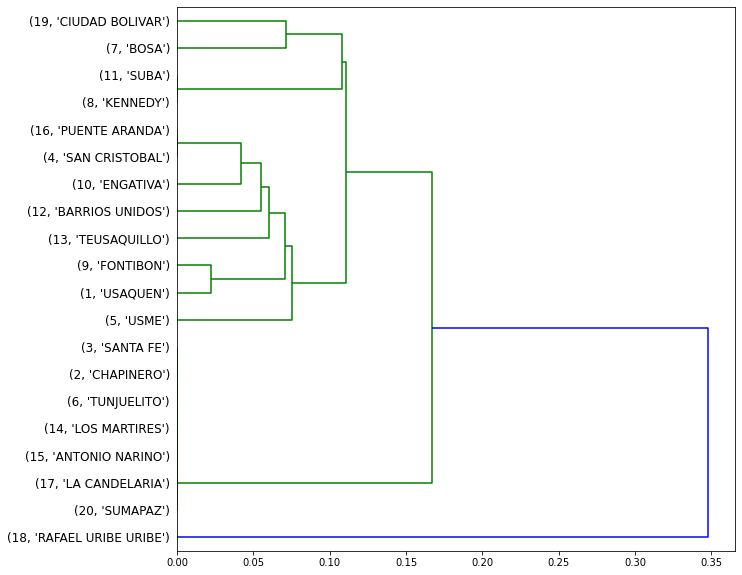

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
#seleccionamos las columnas del DataFrame que queremos asociar
puntos = normales_por_localidad[['excentricidad','anormalidad']]
#Buscamos los clusters en este dataset
asociaciones_puntos = linkage(puntos.values, 'single')
#ponemos etiquetas a los puntos
etiquetas = [puntos.index[i] for i in range(len(puntos))]
#ahora generamos el dendrograma
PyPlot.figure(figsize=(10,10))
dendrogram(asociaciones_puntos,
            orientation='right',
            labels=etiquetas,
            distance_sort='descending',
            show_leaf_counts=True)
PyPlot.show()

#Algunos mapas para clarificar las cosas

In [ ]:
!pip install geopandas
import geopandas as GeoPandas

     |████████████████████████████████| 972kB 7.7MB/s 
     |████████████████████████████████| 6.5MB 12.8MB/s 
     |████████████████████████████████| 14.8MB 282kB/s 


Vamos a cargar un Mapa de Bogotá por localidades usando la librería GeoPandas.

In [ ]:
mapa_localidades = GeoPandas.read_file('https://gist.github.com/jupaneira/a02af9ac03957aed15939ef72bfecfd2/raw/a75ede89adabff65c739268fb8d61137169b5691/bta_localidades.json')

Veamos cómo es el archivo que acabamos de leer.

In [ ]:
mapa_localidades

,id,OBJECTID,NOMBRE,CODIGO_LOC,DECRETO,LINK,SIMBOLO,ESCALA_CAP,FECHA_CAPT,SHAPE_AREA,SHAPE_LEN,geometry
0,None,1,SANTA FE,3,Acuerdo 117 de 2003,None,None,None,None,4.517065e+07,43779.905440,"POLYGON ((-74.06841 4.62880, -74.06807 4.62847..."
1,None,11,PUENTE ARANDA,16,Acuerdo 8 de 1977,None,None,None,None,1.731115e+07,17854.555403,"POLYGON ((-74.11830 4.63741, -74.11504 4.64053..."
2,None,13,CIUDAD BOLIVAR,19,Acuerdo 14 de 1983,None,None,None,None,1.299864e+08,77732.027669,"POLYGON ((-74.15216 4.59976, -74.15218 4.59925..."
3,None,6,BARRIOS UNIDOS,12,Acuerdo 8 de 1977,None,None,None,None,1.190345e+07,13426.542795,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
4,None,2,SUBA,11,Acuerdo 8 de 1977,None,None,None,None,1.005606e+08,65665.349126,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
5,None,14,ANTONIO NARIÑO,15,Acuerdo 117 de 2003,None,None,None,None,4.879543e+06,12085.873823,"POLYGON ((-74.13075 4.59335, -74.12916 4.59327..."
6,None,20,CANDELARIA,17,Acuerdo 117 de 2003,None,None,None,None,2.060243e+06,7444.083075,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
7,None,4,ENGATIVA,10,Acuerdo 8 de 1977,None,None,None,None,3.588097e+07,32351.036738,"POLYGON ((-74.12738 4.73731, -74.12742 4.73885..."
8,None,5,FONTIBON,9,Acuerdo 8 de 1977,None,None,None,None,3.328100e+07,35674.375625,"POLYGON ((-74.15547 4.71798, -74.15478 4.71764..."
9,None,17,SAN CRISTOBAL,4,Acuerdo 117 de 2003,None,None,None,None,4.909850e+07,40291.316126,"POLYGON ((-74.02900 4.55830, -74.02930 4.55821..."


De este mapa, nos interesa en particular los atributos COD_LOC (los códigos de localidad), el nombre de la localidad (NOMBRE) y los atributos de geometría (SHAPE_AREA,SHAPE_LEN, geometry). El resto los podemos descartar.  La otra transformación que tenemos que hacer es que el índice de este DataFrame, lo vamos a hacer que sea el código de localidad y que los nombres de los campos sean iguales.

In [ ]:
#removemos las columnas que no necesitamos
a_remover = ['id','OBJECTID','DECRETO','LINK','SIMBOLO','ESCALA_CAP','FECHA_CAPT']
mapa_localidades = mapa_localidades.drop(columns=a_remover)
#cambiamos los nombres de los campos
mapa_localidades = mapa_localidades.rename(columns={'NOMBRE':'localidad','CODIGO_LOC':'cod_localidad'})
#hacemos que el código de localidad sea un entero
mapa_localidades['cod_localidad'] = mapa_localidades['cod_localidad'].apply(lambda x: int(x))
#hacemos que el índice de este DataFrame sea el índice de localidad
mapa_localidades.set_index(['cod_localidad'],inplace=True)
mapa_localidades

,localidad,SHAPE_AREA,SHAPE_LEN,geometry
cod_localidad,,,,
3,SANTA FE,4.517065e+07,43779.905440,"POLYGON ((-74.06841 4.62880, -74.06807 4.62847..."
16,PUENTE ARANDA,1.731115e+07,17854.555403,"POLYGON ((-74.11830 4.63741, -74.11504 4.64053..."
19,CIUDAD BOLIVAR,1.299864e+08,77732.027669,"POLYGON ((-74.15216 4.59976, -74.15218 4.59925..."
12,BARRIOS UNIDOS,1.190345e+07,13426.542795,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
11,SUBA,1.005606e+08,65665.349126,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
15,ANTONIO NARIÑO,4.879543e+06,12085.873823,"POLYGON ((-74.13075 4.59335, -74.12916 4.59327..."
17,CANDELARIA,2.060243e+06,7444.083075,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
10,ENGATIVA,3.588097e+07,32351.036738,"POLYGON ((-74.12738 4.73731, -74.12742 4.73885..."
9,FONTIBON,3.328100e+07,35674.375625,"POLYGON ((-74.15547 4.71798, -74.15478 4.71764..."


Podemos graficar este mapa de una forma sencilla usando los métodos de la librería GeoPandas.

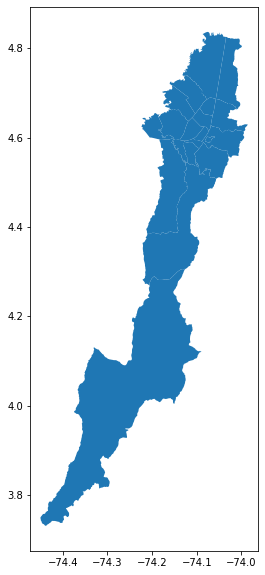

In [ ]:
Figura,subFiguras = PyPlot.subplots(figsize=(10,10))
mapa_localidades.plot(ax=subFiguras)
PyPlot.show()

Lo interesante va a ser agregar a este mapa las columnas del dataFrame de info_localidades que definimos previamente. Esto lo podemos hacer haciendo un join entre DataFrames, pues ambos comparten los mismos índices.

In [ ]:
mapa_densidades = mapa_localidades.join(info_localidad)
mapa_densidades

,,localidad,SHAPE_AREA,SHAPE_LEN,geometry,cod_upz,extension,poblacion,densidad
cod_localidad,localidad,,,,,,,,
1,USAQUEN,USAQUEN,6.531573e+07,46996.167978,"POLYGON ((-74.05725 4.68684, -74.04969 4.73183...",9,3807.206601,461759,121.285511
2,CHAPINERO,CHAPINERO,3.815586e+07,36833.382799,"POLYGON ((-74.05725 4.68684, -74.05220 4.68590...",5,1315.945685,130728,99.341486
3,SANTA FE,SANTA FE,4.517065e+07,43779.905440,"POLYGON ((-74.06841 4.62880, -74.06807 4.62847...",5,697.165850,103544,148.521331
4,SAN CRISTOBAL,SAN CRISTOBAL,4.909850e+07,40291.316126,"POLYGON ((-74.02900 4.55830, -74.02930 4.55821...",5,1648.281488,410092,248.799737
5,USME,USME,2.150664e+08,108895.163760,"POLYGON ((-74.12609 4.54482, -74.12608 4.54482...",7,3029.274751,349176,115.267194
6,TUNJUELITO,TUNJUELITO,9.910940e+06,23330.007022,"POLYGON ((-74.13777 4.59488, -74.13165 4.59363...",2,986.625261,202119,204.858935
7,BOSA,BOSA,2.393545e+07,34117.517640,"POLYGON ((-74.18567 4.64705, -74.18480 4.64497...",5,2393.555890,554389,231.617320
8,KENNEDY,KENNEDY,3.858973e+07,31422.417887,"POLYGON ((-74.15857 4.66274, -74.15845 4.66268...",12,3859.285654,997693,258.517531
9,FONTIBON,FONTIBON,3.328100e+07,35674.375625,"POLYGON ((-74.15547 4.71798, -74.15478 4.71764...",8,3326.821733,330156,99.240665


Ahora que hemos combinado ambos DataFrames, podemos graficar en colores las densidades, poblaciones y extensiones de cada una de las localidades como un mapa de calor.

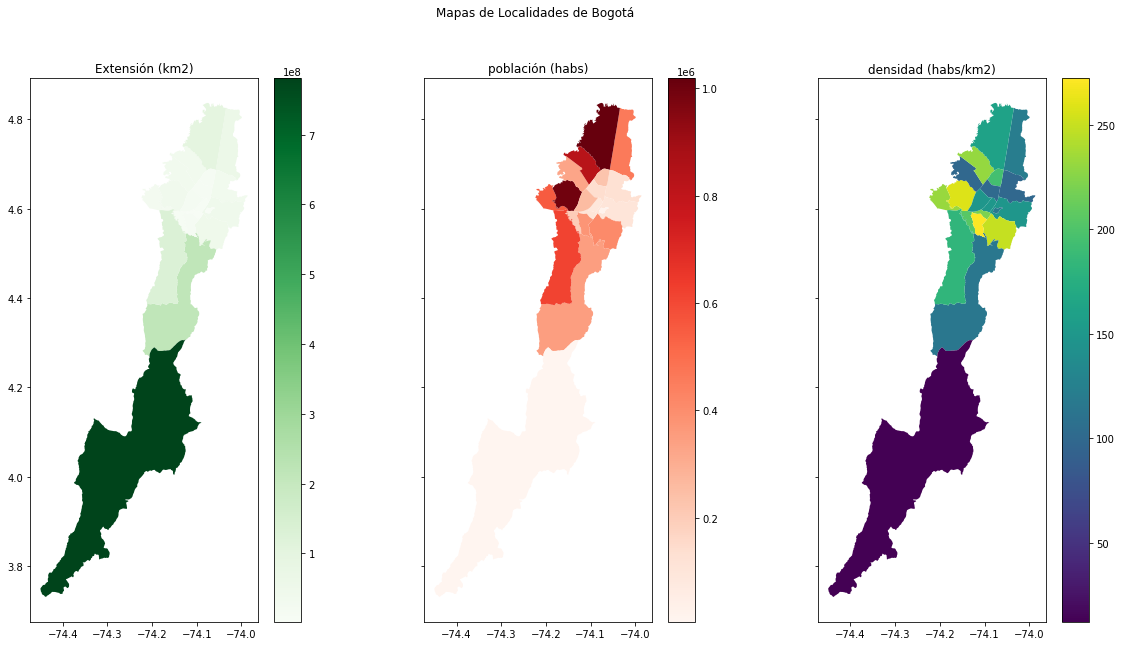

In [ ]:
Figura,subFiguras = PyPlot.subplots(1,3,figsize=(20,10),sharex=True,sharey=True)
Figura.suptitle('Mapas de Localidades de Bogotá')
subFiguras[0].set_title('Extensión (km2)')
subFiguras[1].set_title('población (habs)')
subFiguras[2].set_title('densidad (habs/km2)')
#vamos a crear las barras de color para ver cómo se reparte la
mapa_densidades.plot('SHAPE_AREA',linewidth=0.8,ax=subFiguras[0],cmap='Greens',legend=True)
mapa_densidades.plot('poblacion',linewidth=0.8,ax=subFiguras[1],cmap='Reds',legend=True)
mapa_densidades.plot('densidad',linewidth=0.8,ax=subFiguras[2],cmap='viridis',legend=True)

PyPlot.show()

Regresando sobre el KPI que montamos de excentricidad, podemos graficarlo también como un mapa, si hacemos un join del DataFrame que habíamos planteado antes con el DataFrame que contiene el mapa.

In [ ]:
mapa_excentricidades = mapa_localidades.join(normales_por_localidad)
mapa_excentricidades

,,localidad,SHAPE_AREA,SHAPE_LEN,geometry,ANORMAL_CIUDAD,NORMAL_CIUDAD,excentricidad,anormalidad
cod_localidad,localidad,,,,,,,,
1,USAQUEN,USAQUEN,6.531573e+07,46996.167978,"POLYGON ((-74.05725 4.68684, -74.04969 4.73183...",1,8,0.125000,0.111111
2,CHAPINERO,CHAPINERO,3.815586e+07,36833.382799,"POLYGON ((-74.05725 4.68684, -74.05220 4.68590...",0,5,0.000000,0.000000
3,SANTA FE,SANTA FE,4.517065e+07,43779.905440,"POLYGON ((-74.06841 4.62880, -74.06807 4.62847...",0,5,0.000000,0.000000
4,SAN CRISTOBAL,SAN CRISTOBAL,4.909850e+07,40291.316126,"POLYGON ((-74.02900 4.55830, -74.02930 4.55821...",1,4,0.250000,0.200000
5,USME,USME,2.150664e+08,108895.163760,"POLYGON ((-74.12609 4.54482, -74.12608 4.54482...",2,5,0.400000,0.285714
6,TUNJUELITO,TUNJUELITO,9.910940e+06,23330.007022,"POLYGON ((-74.13777 4.59488, -74.13165 4.59363...",0,2,0.000000,0.000000
7,BOSA,BOSA,2.393545e+07,34117.517640,"POLYGON ((-74.18567 4.64705, -74.18480 4.64497...",2,3,0.666667,0.400000
8,KENNEDY,KENNEDY,3.858973e+07,31422.417887,"POLYGON ((-74.15857 4.66274, -74.15845 4.66268...",4,8,0.500000,0.333333
9,FONTIBON,FONTIBON,3.328100e+07,35674.375625,"POLYGON ((-74.15547 4.71798, -74.15478 4.71764...",1,7,0.142857,0.125000


Que podemos graficar usando un comando similar al que teníamos antes:

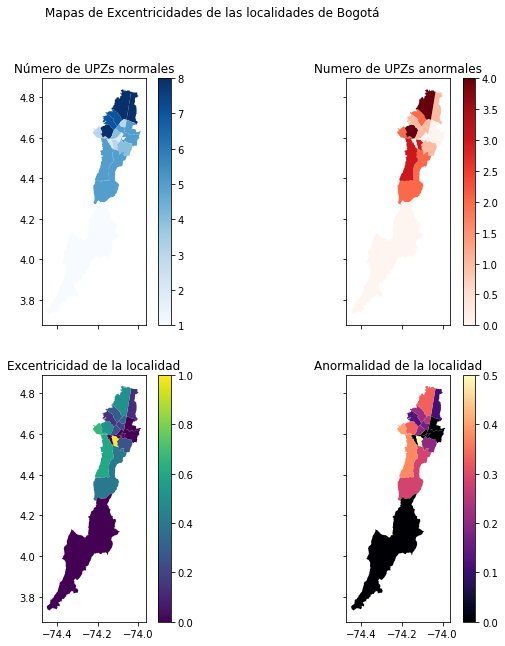

In [ ]:
Figura,subFiguras = PyPlot.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
Figura.suptitle('Mapas de Excentricidades de las localidades de Bogotá')
subFiguras[0,0].set_title('Número de UPZs normales')
subFiguras[0,1].set_title('Numero de UPZs anormales')
subFiguras[1,0].set_title('Excentricidad de la localidad')
subFiguras[1,1].set_title('Anormalidad de la localidad')
#vamos a crear las barras de color para ver cómo se reparte la
mapa_excentricidades.plot('NORMAL_CIUDAD',linewidth=0.8,ax=subFiguras[0,0],cmap='Blues',legend=True)
mapa_excentricidades.plot('ANORMAL_CIUDAD',linewidth=0.8,ax=subFiguras[0,1],cmap='Reds',legend=True)
mapa_excentricidades.plot('excentricidad',linewidth=0.8,ax=subFiguras[1,0],cmap='viridis',legend=True)
mapa_excentricidades.plot('anormalidad',linewidth=0.8,ax=subFiguras[1,1],cmap='magma',legend=True)
PyPlot.show()

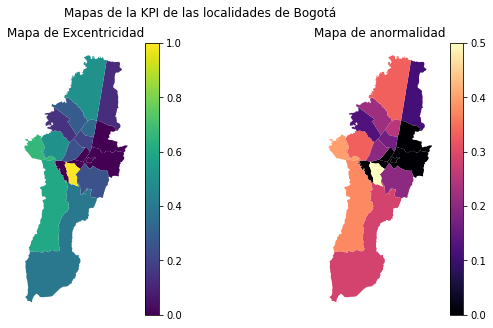

In [ ]:
Figura,subFiguras = PyPlot.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
Figura.suptitle('Mapas de la KPI de las localidades de Bogotá')
subFiguras[0].set_title('Mapa de Excentricidad')
subFiguras[1].set_title('Mapa de anormalidad')
mapa_excentricidades.loc[mapa_excentricidades['localidad']!='SUMAPAZ'].plot('excentricidad',linewidth=0.8,cmap='viridis',legend=True,ax=subFiguras[0])
mapa_excentricidades.loc[mapa_excentricidades['localidad']!='SUMAPAZ'].plot('anormalidad',linewidth=0.8,cmap='magma',legend=True,ax=subFiguras[1])
subFiguras[0].axis('off')
subFiguras[1].axis('off')
PyPlot.show()

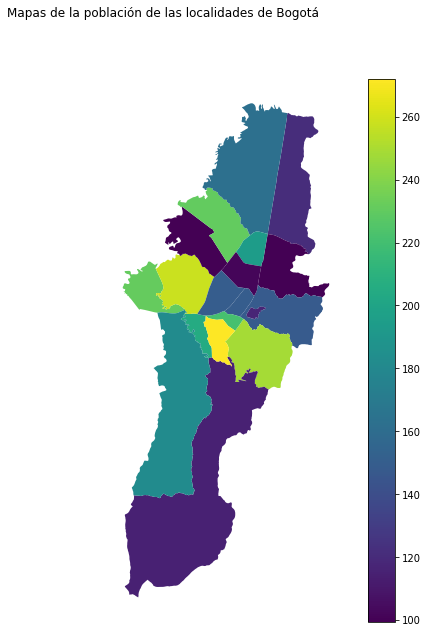

In [ ]:

Figura,subFigura = PyPlot.subplots(figsize=(10,10),sharex=True,sharey=True)
Figura.suptitle('Mapas de la población de las localidades de Bogotá')
mapa_densidades.loc[mapa_densidades['localidad']!='SUMAPAZ'].plot('densidades',linewidth=0.8,ax=subFigura,cmap='viridis',legend=True)
PyPlot.axis('off')
PyPlot.show()

Vamos a importar un mapa de las UPZ para ver cómo se ven los indicadores de densidad de acuerdo a las UPZ.

In [ ]:
mapa_upz = GeoPandas.read_file('https://datosabiertos.bogota.gov.co/dataset/e1c11929-1b57-4900-8cae-0d236123b40a/resource/806a7752-c73d-4643-aaf0-ce88ab659bae/download/upla.json')

Veamos cómo es el contenido del mapa que encontramos.

In [ ]:
mapa_upz

,OBJECTID,UPlCodigo,UPlTipo,UPlNombre,UPlAAdmini,UPlArea,SHAPE_Length,SHAPE_Area,geometry
0,697,UPZ100,1,GALERIAS,Dec 621 de 2006,2.375681e+06,0.060563,0.000193,"POLYGON ((-74.06463 4.64965, -74.07761 4.65186..."
1,698,UPZ83,1,LAS MARGARITAS,,1.472415e+06,0.058093,0.000120,"POLYGON ((-74.17077 4.62848, -74.17135 4.62942..."
2,699,UPZ107,1,QUINTA PAREDES,Dec 086 de 2011,1.739560e+06,0.059576,0.000142,"POLYGON ((-74.09245 4.63648, -74.09265 4.63633..."
3,700,UPZ101,1,TEUSAQUILLO,"Dec 492 de 2007 Mod.=Res 253 de 2009, Dec 591 ...",2.357008e+06,0.063565,0.000192,"POLYGON ((-74.06707 4.63644, -74.07391 4.63763..."
4,701,UPZ91,1,SAGRADO CORAZON,"Dec 492 de 2007 Mod.=Res 249 de 2009, Dec 093 ...",1.467630e+06,0.064912,0.000120,"POLYGON ((-74.06602 4.62604, -74.06666 4.62688..."
...,...,...,...,...,...,...,...,...,...
113,810,UPZ42,1,VENECIA,Dec 459 de 2010,6.638420e+06,0.151210,0.000541,"POLYGON ((-74.14694 4.59496, -74.14780 4.59502..."
114,811,3,2,UPR RIO TUNJUELO,None,2.672778e+08,1.093473,0.021759,"POLYGON ((-74.15932 4.56076, -74.15935 4.56091..."
115,812,4,2,UPR RIO BLANCO,Decreto 553 de diciembre de 2015,3.596661e+08,0.919490,0.029271,"POLYGON ((-74.21393 4.01288, -74.21380 4.01296..."
116,813,5,2,UPR RIO SUMAPAZ,Decreto 552 de diciembre de 2015,4.212839e+08,1.245788,0.034277,"POLYGON ((-74.24627 4.10244, -74.24649 4.10224..."


Notemos que las UPZ tienen un tipo de UPZ. Algunas son rurales (las de tipo 2), algunas son dentro del casco urbano (las de tipo 1). Veamos cómo se ven en un mapa. Notemos que las tipo 1 (urbanas) son 114, mientras que las tipo 2 son apenas 4:

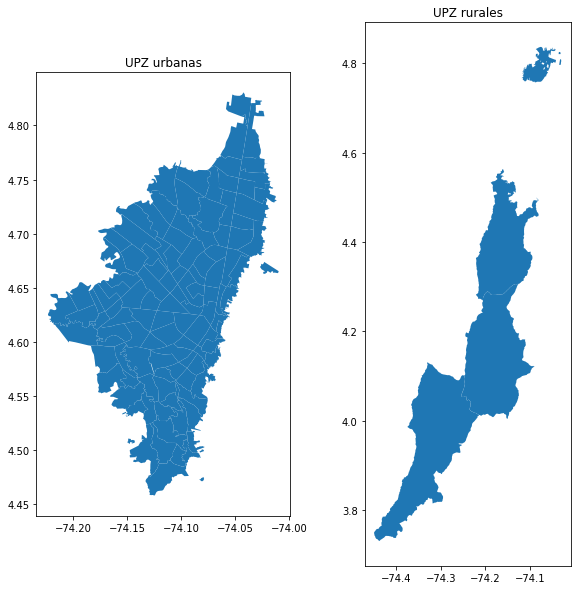

In [ ]:
Figura,subFiguras = PyPlot.subplots(1,2,figsize=(10,10))
subFiguras[0].set_title('UPZ urbanas')
subFiguras[1].set_title('UPZ rurales')
mapa_upz.loc[mapa_upz['UPlTipo']==1].plot(ax=subFiguras[0])
mapa_upz.loc[mapa_upz['UPlTipo']==2].plot(ax=subFiguras[1])

Debemos conciliar los nombres de los campos de este nuevo mapa de UPZ con los nombres del Dataset que teníamos. Primero, podemos deshacernos de algunas columnas.

In [ ]:
#removemos las columnas que no necesitamos
a_remover = ['OBJECTID','UPlAAdmini','UPlArea']
mapa_upz = mapa_upz.drop(columns=a_remover)
#cambiamos los nombres de los campos
mapa_upz = mapa_upz.rename(columns={'UPlNombre':'upz','UPlCodigo':'cod_upz'})
mapa_upz

,cod_upz,UPlTipo,upz,SHAPE_Length,SHAPE_Area,geometry
0,UPZ100,1,GALERIAS,0.060563,0.000193,"POLYGON ((-74.06463 4.64965, -74.07761 4.65186..."
1,UPZ83,1,LAS MARGARITAS,0.058093,0.000120,"POLYGON ((-74.17077 4.62848, -74.17135 4.62942..."
2,UPZ107,1,QUINTA PAREDES,0.059576,0.000142,"POLYGON ((-74.09245 4.63648, -74.09265 4.63633..."
3,UPZ101,1,TEUSAQUILLO,0.063565,0.000192,"POLYGON ((-74.06707 4.63644, -74.07391 4.63763..."
4,UPZ91,1,SAGRADO CORAZON,0.064912,0.000120,"POLYGON ((-74.06602 4.62604, -74.06666 4.62688..."
...,...,...,...,...,...,...
113,UPZ42,1,VENECIA,0.151210,0.000541,"POLYGON ((-74.14694 4.59496, -74.14780 4.59502..."
114,3,2,UPR RIO TUNJUELO,1.093473,0.021759,"POLYGON ((-74.15932 4.56076, -74.15935 4.56091..."
115,4,2,UPR RIO BLANCO,0.919490,0.029271,"POLYGON ((-74.21393 4.01288, -74.21380 4.01296..."
116,5,2,UPR RIO SUMAPAZ,1.245788,0.034277,"POLYGON ((-74.24627 4.10244, -74.24649 4.10224..."


Vamos a remover del mapa las UPZ de tipo rural. Puede que perdamos información acerca de algunas UPZ, pero necesitamos hacer este mapa lo más cercano al dataset de UPZ que tenemos.

In [ ]:
mapa_upz.drop(mapa_upz[mapa_upz['UPlTipo']==2].index,inplace=True)
mapa_upz

,cod_upz,UPlTipo,upz,SHAPE_Length,SHAPE_Area,geometry
0,UPZ100,1,GALERIAS,0.060563,0.000193,"POLYGON ((-74.06463 4.64965, -74.07761 4.65186..."
1,UPZ83,1,LAS MARGARITAS,0.058093,0.000120,"POLYGON ((-74.17077 4.62848, -74.17135 4.62942..."
2,UPZ107,1,QUINTA PAREDES,0.059576,0.000142,"POLYGON ((-74.09245 4.63648, -74.09265 4.63633..."
3,UPZ101,1,TEUSAQUILLO,0.063565,0.000192,"POLYGON ((-74.06707 4.63644, -74.07391 4.63763..."
4,UPZ91,1,SAGRADO CORAZON,0.064912,0.000120,"POLYGON ((-74.06602 4.62604, -74.06666 4.62688..."
...,...,...,...,...,...,...
109,UPZ62,1,TUNJUELITO,0.091747,0.000266,"POLYGON ((-74.12775 4.57026, -74.12793 4.57034..."
110,UPZ53,1,MARCO FIDEL SUAREZ,0.056693,0.000150,"POLYGON ((-74.10459 4.56467, -74.10468 4.56482..."
111,UPZ69,1,ISMAEL PERDOMO,0.094757,0.000456,"POLYGON ((-74.17743 4.59692, -74.17870 4.59699..."
112,UPZ61,1,CIUDAD USME,0.244887,0.000750,"MULTIPOLYGON (((-74.07975 4.47176, -74.07956 4..."


Ahora, tenemos la colulmna de Tipo UPZ redundante (todos son de tipo 1), podemos remover esa columna.

In [ ]:
mapa_upz.drop(columns=['UPlTipo'],inplace=True)
mapa_upz

,cod_upz,upz,SHAPE_Length,SHAPE_Area,geometry
0,UPZ100,GALERIAS,0.060563,0.000193,"POLYGON ((-74.06463 4.64965, -74.07761 4.65186..."
1,UPZ83,LAS MARGARITAS,0.058093,0.000120,"POLYGON ((-74.17077 4.62848, -74.17135 4.62942..."
2,UPZ107,QUINTA PAREDES,0.059576,0.000142,"POLYGON ((-74.09245 4.63648, -74.09265 4.63633..."
3,UPZ101,TEUSAQUILLO,0.063565,0.000192,"POLYGON ((-74.06707 4.63644, -74.07391 4.63763..."
4,UPZ91,SAGRADO CORAZON,0.064912,0.000120,"POLYGON ((-74.06602 4.62604, -74.06666 4.62688..."
...,...,...,...,...,...
109,UPZ62,TUNJUELITO,0.091747,0.000266,"POLYGON ((-74.12775 4.57026, -74.12793 4.57034..."
110,UPZ53,MARCO FIDEL SUAREZ,0.056693,0.000150,"POLYGON ((-74.10459 4.56467, -74.10468 4.56482..."
111,UPZ69,ISMAEL PERDOMO,0.094757,0.000456,"POLYGON ((-74.17743 4.59692, -74.17870 4.59699..."
112,UPZ61,CIUDAD USME,0.244887,0.000750,"MULTIPOLYGON (((-74.07975 4.47176, -74.07956 4..."


Mientras que en este mapa, los códigos de upz son de la forma UPZ(XX) con (XX) el número de la UPZ, en el dataset original tenemos solo los números de la UPZ. Podemos quitar este 'UPZ' extra usando una función lambda.

In [ ]:
def corregir_cod_upz(cod_original):
  cod_sin_upz = cod_original.replace('UPZ','')
  return int(cod_sin_upz)

mapa_upz['cod_upz'] = mapa_upz['cod_upz'].apply(lambda x: corregir_cod_upz(x))
mapa_upz

,cod_upz,upz,SHAPE_Length,SHAPE_Area,geometry
0,100,GALERIAS,0.060563,0.000193,"POLYGON ((-74.06463 4.64965, -74.07761 4.65186..."
1,83,LAS MARGARITAS,0.058093,0.000120,"POLYGON ((-74.17077 4.62848, -74.17135 4.62942..."
2,107,QUINTA PAREDES,0.059576,0.000142,"POLYGON ((-74.09245 4.63648, -74.09265 4.63633..."
3,101,TEUSAQUILLO,0.063565,0.000192,"POLYGON ((-74.06707 4.63644, -74.07391 4.63763..."
4,91,SAGRADO CORAZON,0.064912,0.000120,"POLYGON ((-74.06602 4.62604, -74.06666 4.62688..."
...,...,...,...,...,...
109,62,TUNJUELITO,0.091747,0.000266,"POLYGON ((-74.12775 4.57026, -74.12793 4.57034..."
110,53,MARCO FIDEL SUAREZ,0.056693,0.000150,"POLYGON ((-74.10459 4.56467, -74.10468 4.56482..."
111,69,ISMAEL PERDOMO,0.094757,0.000456,"POLYGON ((-74.17743 4.59692, -74.17870 4.59699..."
112,61,CIUDAD USME,0.244887,0.000750,"MULTIPOLYGON (((-74.07975 4.47176, -74.07956 4..."


In [ ]:
mapa_upz.dtypes

cod_upz            int64
upz               object
SHAPE_Length     float64
SHAPE_Area       float64
geometry        geometry
dtype: object

Ahora, tomando el dataset original (upz_info) podemos hacer un join mediante el código de UPZ con este mapa.


In [ ]:
mapa_upz_info = mapa_upz.merge(info_upz,on=['cod_upz','upz'])

In [ ]:
mapa_upz_info.dtypes

cod_upz             int64
upz                object
SHAPE_Length      float64
SHAPE_Area        float64
geometry         geometry
cod_localidad       int64
localidad          object
extension         float64
poblacion           int64
densidad          float64
z_ciudad          float64
z_upz             float64
clas_ciudad        object
clas_upz           object
dtype: object

Con esto podremos ver cómo se distribuyen en términos de densidad y coeficientes las UPZ del casco urbano.

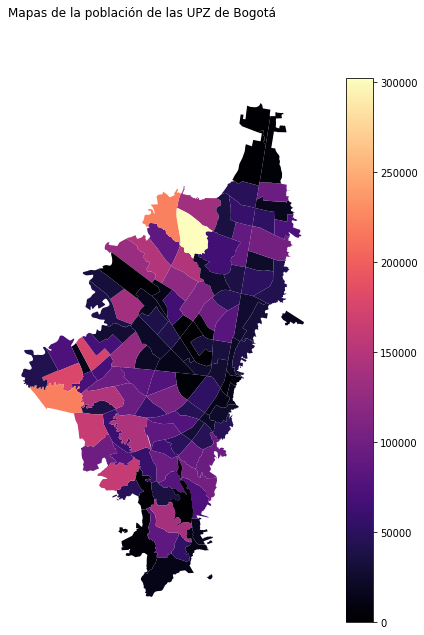

In [ ]:
Figura,subFigura = PyPlot.subplots(figsize=(10,10),sharex=True,sharey=True)
Figura.suptitle('Mapas de la población de las UPZ de Bogotá')
mapa_upz_info.plot('poblacion',linewidth=1.0,ax=subFigura,cmap='magma',legend=True)
PyPlot.axis('off')
PyPlot.show()

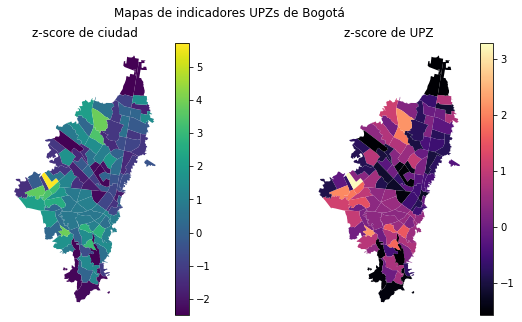

In [ ]:
Figura,subFiguras = PyPlot.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
Figura.suptitle('Mapas de indicadores UPZs de Bogotá')
subFiguras[0].set_title('z-score de ciudad')
subFiguras[1].set_title('z-score de UPZ')
#vamos a crear las barras de color para ver cómo se reparte la
mapa_upz_info.plot('z_ciudad',linewidth=0.8,ax=subFiguras[0],cmap='viridis',legend=True)
mapa_upz_info.plot('z_upz',linewidth=0.8,ax=subFiguras[1],cmap='magma',legend=True)
subFiguras[0].axis('off')
subFiguras[1].axis('off')
PyPlot.show()

Podemos sacar mapas de cada una de las localidades filtrando los datos por el nombre de la localidad.

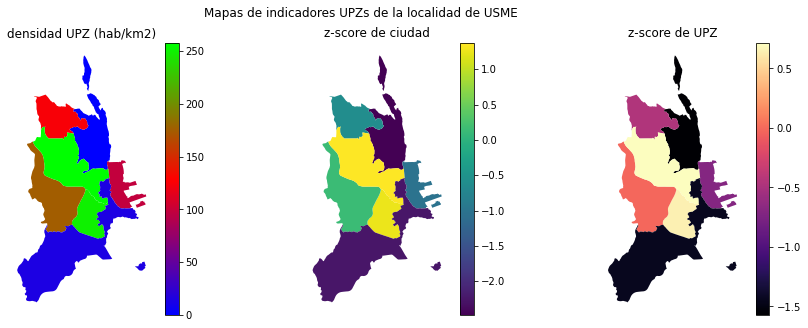

In [ ]:
sub_mapa = mapa_upz_info.loc[mapa_upz_info['cod_localidad']==5]
nom_localidad = sub_mapa.iloc[0]['localidad']
Figura,subFiguras = PyPlot.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
Figura.suptitle('Mapas de indicadores UPZs de la localidad de '+nom_localidad)
subFiguras[0].set_title('densidad UPZ (hab/km2)')
subFiguras[1].set_title('z-score de ciudad')
subFiguras[2].set_title('z-score de UPZ')
#vamos a crear las barras de color para ver cómo se reparte la
sub_mapa.plot('densidad',linewidth=0.8,ax=subFiguras[0],cmap='brg',legend=True)
sub_mapa.plot('z_ciudad',linewidth=0.8,ax=subFiguras[1],cmap='viridis',legend=True)
sub_mapa.plot('z_upz',linewidth=0.8,ax=subFiguras[2],cmap='magma',legend=True)
subFiguras[0].axis('off')
subFiguras[1].axis('off')
subFiguras[2].axis('off')
PyPlot.show()

In [ ]:
info_upz.loc[info_upz['cod_localidad']==15]

,cod_localidad,localidad,cod_upz,upz,extension,poblacion,densidad,z_ciudad,z_upz,clas_ciudad,clas_upz
52,15,ANTONIO NARINO,38,RESTREPO,354.715513,77022,217.137388,0.763308,0.353167,NORMAL_CIUDAD,NORMAL_UPZ
110,15,ANTONIO NARINO,35,CIUDAD JARDIN,133.239133,30913,232.011416,0.985167,0.484932,NORMAL_CIUDAD,NORMAL_UPZ


In [ ]:
info_upz.loc[info_upz['cod_localidad']==3]

,cod_localidad,localidad,cod_upz,upz,extension,poblacion,densidad,z_ciudad,z_upz,clas_ciudad,clas_upz
1,3,SANTA FE,96,LOURDES,200.137127,46301,231.346381,0.975247,0.479041,NORMAL_CIUDAD,NORMAL_UPZ
28,3,SANTA FE,92,LA MACARENA,85.897281,14350,167.060002,0.016360,-0.090454,NORMAL_CIUDAD,NORMAL_UPZ
42,3,SANTA FE,91,SAGRADO CORAZON,146.189274,5879,40.214989,-1.875645,-1.214139,NORMAL_CIUDAD,NORMAL_UPZ
55,3,SANTA FE,95,LAS CRUCES,92.368307,23241,251.612276,1.277531,0.658571,NORMAL_CIUDAD,NORMAL_UPZ
83,3,SANTA FE,93,LAS NIEVES,172.573860,13773,79.809306,-1.285061,-0.863384,NORMAL_CIUDAD,NORMAL_UPZ
